In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(322)
fraud_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_2023.csv')

In [ ]:
#x = fraud_df.drop(['id','Class'],axis=1).values
y = fraud_df.Class.values
x = fraud_df.iloc[:,1:29].values
#x = fraud_df.iloc[:,12:14].values
z = fraud_df.iloc[:,12:14].values
print(x)

[[-0.2606478  -0.46964845  2.49626608 ... -0.43482398 -0.08123011
  -0.15104549]
 [ 0.98509973 -0.35604509  0.55805635 ...  0.2965027  -0.24805206
  -0.06451192]
 [-0.26027161 -0.94938461  1.72853778 ... -0.31289455 -0.30025804
  -0.24471823]
 ...
 [-0.31199739 -0.00409479  0.13752559 ... -0.75583596 -0.48753975
  -0.26874127]
 [ 0.63687054 -0.51696952 -0.30088853 ... -1.43493112 -0.15926926
  -0.07625057]
 [-0.79514417  0.43323608 -0.64914005 ... -1.09097429 -1.5751126
   0.7229365 ]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,test_size=0.99)
#x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,test_size=0.9999)

In [ ]:
from sklearn.preprocessing import StandardScaler
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std = StandardScaler().fit_transform(x_test)
z_train_std = StandardScaler().fit_transform(z_train)
z_test_std = StandardScaler().fit_transform(z_test)

In [ ]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.fit_transform(x_test_std)
print(x_train_pca)

[[-7.23397394  2.67153507]
 [-0.45428348  1.07048775]
 [ 2.82914724  0.49424365]
 ...
 [ 2.86060324 -0.47177928]
 [-3.63700976  0.46470208]
 [ 2.20990584 -0.26252373]]


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(x_train_pca, y_train)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
x_train_kpca = kpca.fit_transform(x_train_std)

In [ ]:
from sklearn.manifold import TSNE
x_train_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(x_train_std)

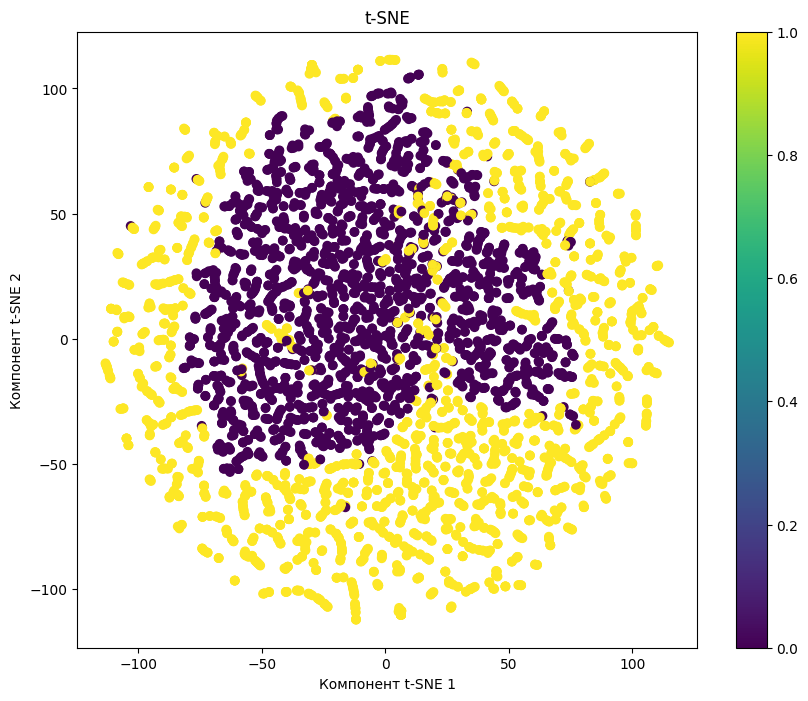

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_train_embedded[:, 0], x_train_embedded[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title('t-SNE')
plt.xlabel('Компонент t-SNE 1')
plt.ylabel('Компонент t-SNE 2')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

<ipython-input-12-24aaab6dcf83>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


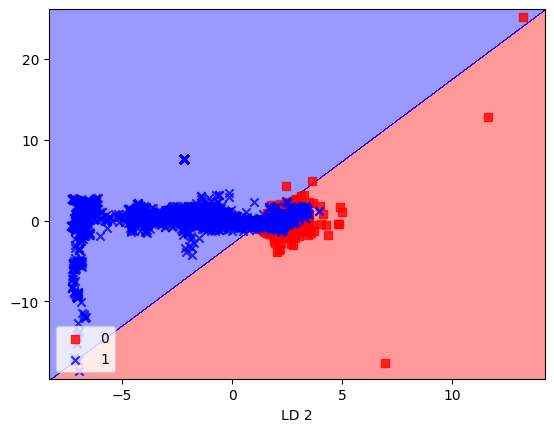

In [ ]:
lr = LogisticRegression()
lr = lr.fit(x_train_pca, y_train)

plot_decision_regions(x_train_pca, y_train, classifier = lr)
plt.xlabel('LD 1')
plt.xlabel('LD 2')
plt.legend(loc = 'lower left')
plt.show()

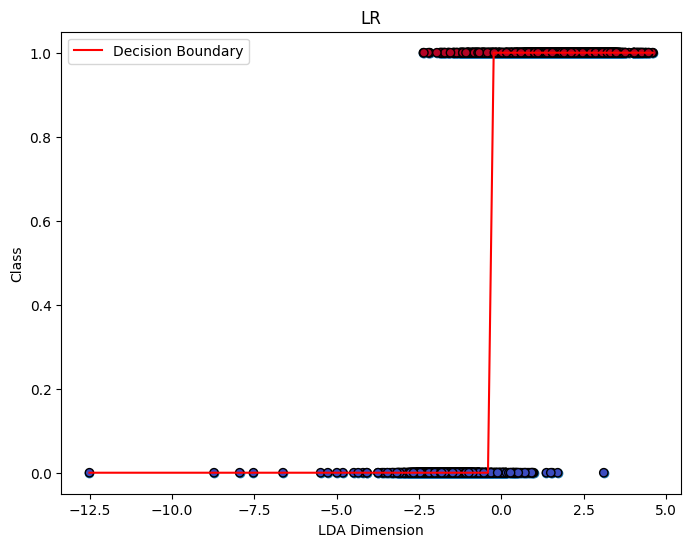

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_lda, y_train)
plt.show
X_train_lda = X_train_lda.reshape(-1, 1)

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)


line = np.linspace(X_train_lda.min(), X_train_lda.max(), 100).reshape(-1, 1)

predictions = lr.predict(line)

plt.plot(line, predictions, color='r', label='Decision Boundary')
plt.scatter(X_train_lda, y_train, c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('LR')
plt.xlabel('LDA Dimension')
plt.ylabel('Class')
plt.legend()
plt.show()

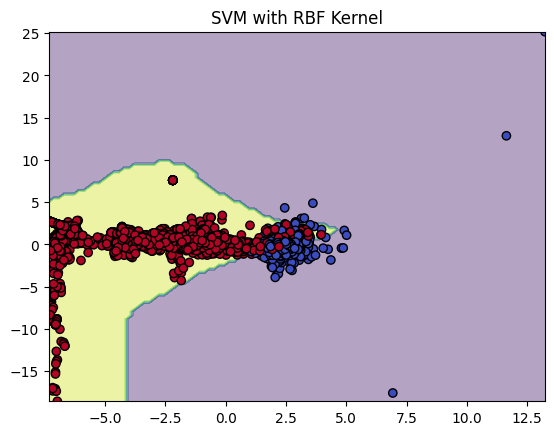

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=100)
svm.fit(x_train_pca, y_train)

xx, yy = np.meshgrid(np.linspace(x_train_pca[:, 0].min(), x_train_pca[:, 0].max(), 100),
                     np.linspace(x_train_pca[:, 1].min(), x_train_pca[:, 1].max(), 100))
zz = svm.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

plt.contourf(xx, yy, zz, alpha=0.4)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('SVM with RBF Kernel')
plt.show()

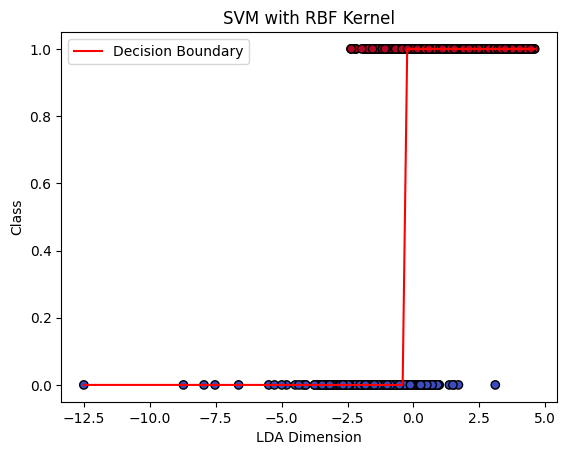

In [ ]:
X_train_lda = X_train_lda.reshape(-1, 1)

svm = SVC(kernel='rbf', C=100)
svm.fit(X_train_lda, y_train)


line = np.linspace(X_train_lda.min(), X_train_lda.max(), 100).reshape(-1, 1)

predictions = svm.predict(line)

plt.plot(line, predictions, color='r', label='Decision Boundary')
plt.scatter(X_train_lda, y_train, c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('SVM with RBF Kernel')
plt.xlabel('LDA Dimension')
plt.ylabel('Class')
plt.legend()
plt.show()

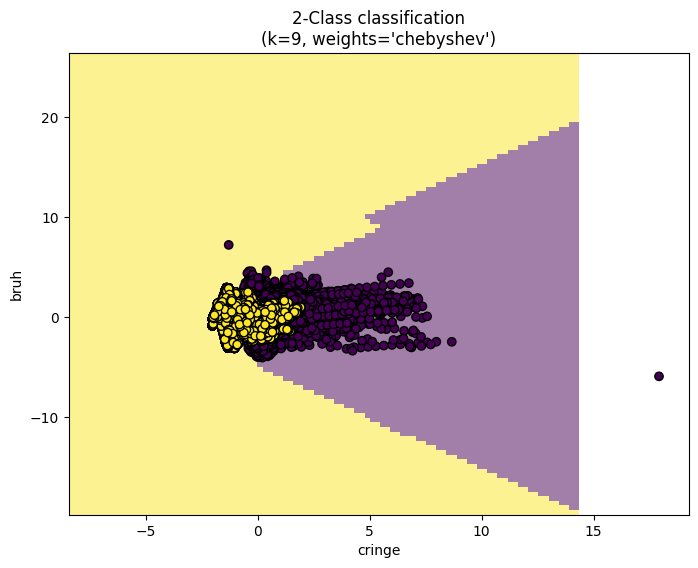

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

classifier = KNeighborsClassifier(n_neighbors=9, metric='chebyshev')

classifier.fit(x_train_pca, y_train)

fig, ax = plt.subplots(figsize=(8, 6))

disp = DecisionBoundaryDisplay.from_estimator(
    classifier,
    x_train_pca,
    xlabel='cringe',
    ylabel='bruh',
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.5,
    ax=ax,
)
scatter = disp.ax_.scatter(z[:, 0], z[:, 1], c=y, edgecolors="k")
_ = disp.ax_.set_title("2-Class classification\n(k=9, weights='chebyshev')")
plt.show()

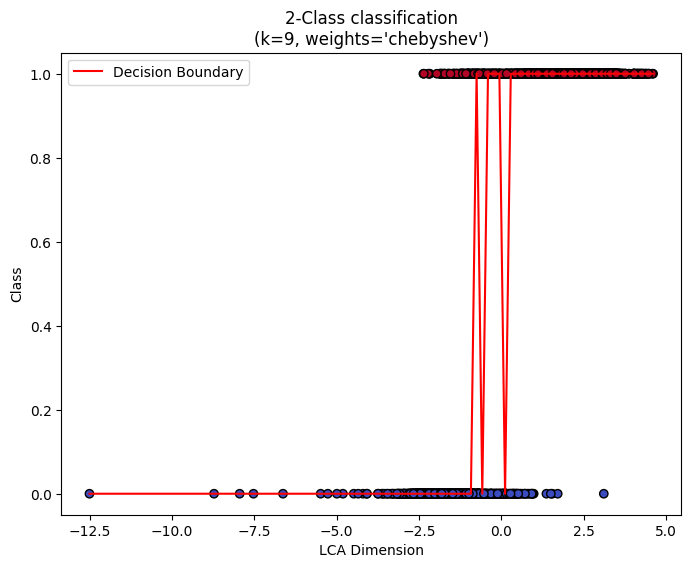

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

X_train_lda = X_train_lda.reshape(-1, 1)

classifier = KNeighborsClassifier(n_neighbors=9, metric='chebyshev')
classifier.fit(X_train_lda, y_train)

fig, ax = plt.subplots(figsize=(8, 6))

line = np.linspace(X_train_lda.min(), X_train_lda.max(), 100).reshape(-1, 1)

predictions = classifier.predict(line)

ax.plot(line, predictions, color='r', label='Decision Boundary')

scatter = ax.scatter(X_train_lda, y_train, c=y_train, cmap='coolwarm', edgecolors='k')

ax.set_xlabel('LA Dimension')
ax.set_ylabel('Class')
ax.set_title("2-Class classification\n(k=9, weights='chebyshev')")

ax.legend()

plt.show()


Вывод
---
Методы снижения размерности позволяют сократить время и ресурсы обучения. Для данного набора данных лучше показывает себя метод анализа главных компонент.



1. Поясните принцип работы метода анализа главных компонент?
Метод анализа главных компонент (PCA) основан на поиске линейных комбинаций исходных признаков, которые максимально сохраняют дисперсию данных, тем самым снижая размерность признакового пространства.

2. В каких случаях целесообразно применять нелинейное снижение размерности данных ядерным методом анализа главных компонент?
Нелинейное снижение размерности с использованием ядерного метода анализа главных компонент (Kernel PCA) целесообразно в случаях, когда данные имеют нелинейную структуру, которую линейные методы не могут уловить эффективно.

3. Какие допущения к данным применяются при использовании линейного дискриминантного анализа?
Линейный дискриминантный анализ (LDA) предполагает, что данные имеют нормальное распределение в каждом классе и равную ковариационную матрицу для всех классов.

4. В чем заключается метод объясненной дисперсии?
Метод объясненной дисперсии (Explained Variance) заключается в оценке доли общей дисперсии, которая объясняется определенным набором факторов или компонент.

5. Перечислите методы нелинейного снижения размерности признакового пространства.
Методы нелинейного снижения размерности признакового пространства включают в себя t-SNE (t-distributed Stochastic Neighbor Embedding), Isomap (Isometric Mapping), LLE (Locally Linear Embedding) и другие.

6. Поясните почему при разных инициализациях метода t-SNE могут получаться разные результаты.
Результаты метода t-SNE могут отличаться при разных инициализациях из-за его стохастической природы: начальное расположение точек в пространстве влияет на финальное расположение после процесса оптимизации.